## Organize the format for RIGID

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_training_original = pd.read_excel('train.xlsx')

cols = ['L', 'w', 'w^3','alpha', 'num_vert', 'num_hori']

counts = df_training_original.groupby(cols).size().reset_index(name='count')
repeated_samples = counts[counts['count'] > 1]

dup_rows = df_training_original.reset_index().merge(repeated_samples, on=cols, how='inner')

print("unique samples", counts.shape[0], "") 
print("repeated samples", repeated_samples.shape[0]) 
print(repeated_samples)
print("Repeated line:", dup_rows.shape[0])
# print(dup_rows.head(20))

df_training_dedup = df_training_original.drop_duplicates(subset=cols, keep='first')

print("original line:", df_training_original.shape[0])
print("after deduplication:", df_training_dedup.shape[0])



unique samples 2062 
repeated samples 3
        L    w    w^3     alpha  num_vert  num_hori  count
1064  2.0  0.3  0.027  0.872665         1         1      2
1069  2.0  0.3  0.027  0.872665         2         2      2
1079  2.0  0.3  0.027  0.872665         4         4      2
Repeated line: 6
original line: 2065
after deduplication: 2062


In [4]:
all_rows = []

eps_n = np.linspace(0, 1, 31)

for idx in range(len(df_training_dedup)):
    row = df_training_dedup.iloc[idx]
    s_array = row['s1':'s31'].to_numpy()

    L = row['L']
    w = row['w']
    w_cubic = row['w^3']
    alpha = row['alpha']
    num_vert = row['num_vert']
    num_hori = row['num_hori']

    for i in range(31):
        if i == 0:
            continue
        input_output_row = [L, w, w_cubic, alpha, num_vert, num_hori, eps_n[i], s_array[i]]
        all_rows.append(input_output_row)

columns = ['L', 'w', 'w_cubic', 'alpha', 'num_vert', 'num_hori', 'strain', 'stress']
df_out = pd.DataFrame(all_rows, columns=columns)

df_out.to_csv('stress_strain_training_data.csv', index=False)

print("✅ csv file saved:", df_out.shape)

✅ csv file saved: (61860, 8)


In [10]:
# cols = df_training.columns[:6]   
# all_equal = (df_training[cols].nunique() == 1).all()
# print("All first 6 columns are equal:", all_equal)

In [7]:
df_testing_original = pd.read_excel('test.xlsx')


cols = ['L', 'w', 'w^3','alpha', 'num_vert', 'num_hori']

counts = df_testing_original.groupby(cols).size().reset_index(name='count')
repeated_samples = counts[counts['count'] > 1]

dup_rows = df_testing_original.reset_index().merge(repeated_samples, on=cols, how='inner')

print("unique samples", counts.shape[0], "") 
print("repeated samples", repeated_samples.shape[0]) 
print(repeated_samples)
print("Repeated line:", dup_rows.shape[0])
# print(dup_rows.head(20))

df_training_dedup = df_testing_original.drop_duplicates(subset=cols, keep='first')

print("original line:", df_testing_original.shape[0])
print("after deduplication:", df_training_dedup.shape[0])



unique samples 231 
repeated samples 0
Empty DataFrame
Columns: [L, w, w^3, alpha, num_vert, num_hori, count]
Index: []
Repeated line: 0
original line: 231
after deduplication: 231


In [8]:
all_rows = []

eps_n = np.linspace(0, 1, 31)

for idx in range(len(df_testing_original)):
    row = df_testing_original.loc[idx]
    s_array = row['s1':'s31'].to_numpy()

    L = row['L']
    w = row['w']
    w_cubic = row['w^3']
    alpha = row['alpha']
    num_vert = row['num_vert']
    num_hori = row['num_hori']

    for i in range(31):
        if i == 0:
            continue
        input_output_row = [L, w, w_cubic, alpha, num_vert, num_hori, eps_n[i], s_array[i]]
        all_rows.append(input_output_row)

columns = ['L', 'w', 'w_cubic', 'alpha', 'num_vert', 'num_hori', 'strain', 'stress']
df_out = pd.DataFrame(all_rows, columns=columns)

df_out.to_csv('stress_strain_testing_data.csv', index=False)

print("✅ csv file saved:", df_out.shape)


✅ csv file saved: (6930, 8)


## Plot dataset

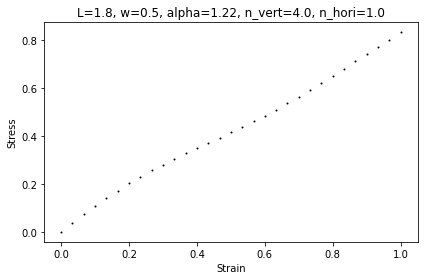

In [4]:
df_training = pd.read_excel('train.xlsx')

idx = 1

s_values = df_training.loc[idx, 's1':'s31']
s_array = s_values.to_numpy()
row = df_training.loc[idx]
L = row['L']
w = row['w']
w_cubic = row['w^3']
alpha = row['alpha']
num_vert = row['num_vert']
num_hori = row['num_hori']

eps_n = np.linspace(0,1,31)

title_str = f"L={L}, w={w}, alpha={alpha:.2f}, n_vert={num_vert}, n_hori={num_hori}"

plt.figure(figsize=(6, 4))
plt.plot(eps_n, s_array, 'o', markersize=1, color='black')
plt.title(title_str)
plt.xlabel('Strain')  
plt.ylabel('Stress')  
plt.tight_layout()
plt.show()


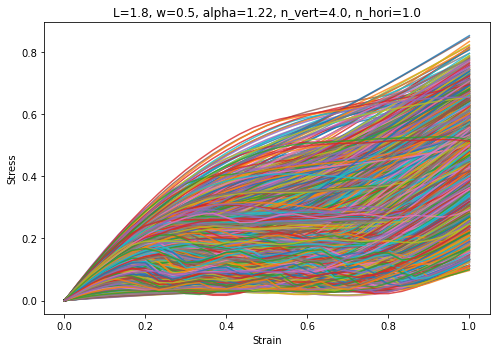

In [5]:

s_values = df_training.loc[:, 's1':'s31']
s_array = s_values.to_numpy()

row = df_training.loc[1]
L = row['L']
w = row['w']
w_cubic = row['w^3']
alpha = row['alpha']
num_vert = row['num_vert']
num_hori = row['num_hori']

eps_n = np.linspace(0, 1, 31)
title_str = f"L={L}, w={w}, alpha={alpha:.2f}, n_vert={num_vert}, n_hori={num_hori}"

plt.figure(figsize=(7, 5))
for i in range(s_array.shape[0]):
    plt.plot(eps_n, s_array[i], alpha=0.8)

plt.title(title_str)
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.tight_layout()
plt.show()

## Property evaluation (threshold, stroke, area)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

def curve_classification(s_array):
    
    min_idx = argrelextrema(s_array, np.less)[0]

    return len(min_idx)

def property_extraction(design, s_array):
    
    threshold, stroke, normalized_delta_strain, snap, area = 0, 0, 0, 0, 0
    
    L = design['L']
    num_vert = design['num_vert']
    num_hori = design['num_hori']
    normalized_strain = np.linspace(0, 1, 31)
    
    max_idx = argrelextrema(s_array, np.greater)[0]
    min_idx = argrelextrema(s_array, np.less)[0]

    local_max = list(zip(normalized_strain[max_idx], s_array[max_idx]))
    local_min = list(zip(normalized_strain[min_idx], s_array[min_idx]))

    # There are some tricky cases that we have local maxima but no local minima.
    if len(max_idx) == 0 or len(min_idx) == 0:
        return local_max, local_min, threshold, stroke, normalized_delta_strain, snap, area

    threshold = local_max[0][1]
    
    threshold_stress = local_max[0][1]
    threshold_strain = local_max[0][0]
    threshold = threshold_stress

    # 2. stroke
    idx_list = []
    for i in range(1, len(s_array)):
        if normalized_strain[i] > threshold_strain: 
            if s_array[i-1] < threshold_stress and s_array[i] >= threshold_stress:
                idx_list.append(i)
    if idx_list:
        idx_last = idx_list[-1]
        normalized_delta_strain = normalized_strain[idx_last] - threshold_strain
    else:
        stroke = 0
    
    L_total = 4.63 * num_vert + num_vert - 1
    nominal_delta_strain = normalized_delta_strain * (0.5*L - 0.35) * num_vert / L_total
    stroke = nominal_delta_strain * L_total

    # 3. snap
    snap = local_max[0][1] - local_min[-1][1]

    # 4. area = stroke * snap
    area = stroke * snap

    return local_max, local_min, threshold, stroke, normalized_delta_strain, snap, area

    

In [7]:
df_training = pd.read_excel('train.xlsx')

eps_n = np.linspace(0,1,31)

curve_types = []

for idx in range(len(df_training)):
    s_values = df_training.loc[idx, 's1':'s31']
    s_array = s_values.to_numpy()
    
    n_local_min = curve_classification(s_array)
    curve_types.append(n_local_min)

df_training['curve_type'] = curve_types


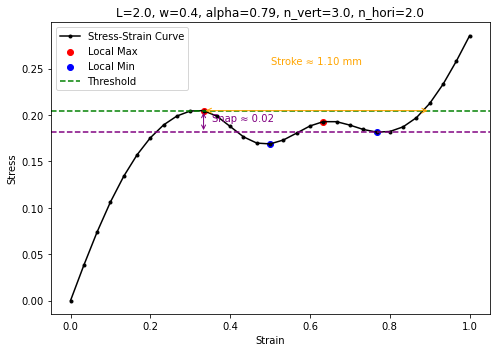

In [8]:
idx = 21
fluctuation = 2

df_type_selected = df_training[df_training['curve_type'] == fluctuation]

row = df_type_selected.iloc[idx]

s_array = row.loc['s1':'s31'].to_numpy()

L = row['L']
w = row['w']
w_cubic = row['w^3']
alpha = row['alpha']
num_vert = row['num_vert']
num_hori = row['num_hori']

eps_n = np.linspace(0, 1, 31)

title_str = f"L={L}, w={w}, alpha={alpha:.2f}, n_vert={num_vert}, n_hori={num_hori}"

local_max, local_min, threshold, stroke, norm_delta_strain, snap, area = property_extraction(row, s_array)

plt.figure(figsize=(7, 5))
plt.plot(eps_n, s_array, 'o-', markersize=3, color='black', label='Stress-Strain Curve')

if local_max:
    max_pts = np.array(local_max)
    plt.scatter(max_pts[:, 0], max_pts[:, 1], color='red', label='Local Max')
if local_min:
    min_pts = np.array(local_min)
    plt.scatter(min_pts[:, 0], min_pts[:, 1], color='blue', label='Local Min')

plt.axhline(threshold, color='green', linestyle='--', label='Threshold')


plt.axhline(threshold - snap, color='purple', linestyle='--')

if stroke > 0:
    threshold_strain = local_max[0][0]
    stroke_end_strain = threshold_strain + norm_delta_strain
    plt.annotate('', xy=(stroke_end_strain, threshold), xytext=(threshold_strain, threshold),
                 arrowprops=dict(arrowstyle='<->', color='orange'), fontsize=12)
    plt.text((threshold_strain + stroke_end_strain)/2, threshold + 0.05,
             f"Stroke ≈ {stroke:.2f} mm", ha='center', color='orange')

if snap > 0:
    snap_top = local_max[0][1]
    snap_bot = local_min[-1][1]
    snap_x = local_max[0][0]
    plt.annotate('', xy=(snap_x, snap_bot), xytext=(snap_x, snap_top),
                 arrowprops=dict(arrowstyle='<->', color='purple'))
    plt.text(snap_x + 0.02, (snap_top + snap_bot)/2, f"Snap ≈ {snap:.2f}", color='purple')

plt.title(title_str)
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("Non snap:",df_training[df_training['curve_type'] == 0].shape[0])
print("One wave:",df_training[df_training['curve_type'] == 1].shape[0])
print("Two wave:",df_training[df_training['curve_type'] == 2].shape[0])
print("Three wave:",df_training[df_training['curve_type'] == 3].shape[0])
print("Four wave:",df_training[df_training['curve_type'] == 4].shape[0])

Non snap: 1553
One wave: 190
Two wave: 140
Three wave: 105
Four wave: 77


In [11]:
import pandas as pd
import plotly.graph_objs as go

df_training = pd.read_excel('train.xlsx')

filtered_df = df_training[(df_training['num_vert'] == 3) & (df_training['num_hori'] == 3)]

L_vals = filtered_df['L']
w_vals = filtered_df['w']
alpha_vals = filtered_df['alpha']

fig = go.Figure(data=[go.Scatter3d(
    x=L_vals,
    y=w_vals,
    z=alpha_vals,
    mode='markers',
    marker=dict(size=4, color='blue'),
)])

fig.update_layout(
    scene=dict(
        xaxis_title='L',
        yaxis_title='w',
        zaxis_title='alpha',
    ),
    title='Interactive 3D Plot: num_vert=1 & num_hori=1',
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()
